# TESTS DE COMPROBACIÓN

- nº de trayectorias en cada frame vs frame
- función suavizado para localizar puntos (savgol, polinomio orden 3)
- (v_media)²/<v²> <<< 1
- f(v_x) vs v_x // f(v_y) vs v_y 


                  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pims
from pandas import DataFrame, Series  
import trackpy as tp
from scipy.signal import savgol_filter
import math

#interactive graphics
%matplotlib widget 

from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import Image

L= 800 # system size (pixels)

In [2]:
def tracks_len(df):
    track_list = np.unique(df.track.values) # list of current track_listk IDs
    ntracks = len(track_list)
    lengths = np.array( [len(df[df.track==i]) for i in track_list] ) # length of each track
    return track_list, lengths, ntracks

In [3]:
def printp(string):
    """ Modification of print function to do everything on one line """
    import sys
    sys.stdout.write('\r'+ str(string))
    sys.stdout.flush()

In [67]:
#función para representar una trayectoria de un df
def track(df, t_id):
    tr = df[df.track==t_id]
    return tr

def plot_track(df,t_id):
    fig = plt.figure(t_id)
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim(0,L)
    ax.set_ylim(0,L)
    ax.set_aspect(1)
    ax.add_artist(plt.Circle((L/2,L/2),L/2, fill=False, edgecolor='r', linewidth=2));
    ax.plot(track(df, t_id).x.values, track(df,t_id).y.values, '.', c='b')
    print('run \'plot.close(t_id)\' when finished\n')

In [56]:
#función para representar la misma trayectoria (t_id) de dos df (sin filtrar y filtrado)
def track(df, t_id):
    tr = df[df.track==t_id]
    return tr

def plot_track2(df1,df2,t_id):
    fig = plt.figure(t_id)
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim(0,L)
    ax.set_ylim(0,L)
    ax.set_aspect(1)
    ax.add_artist(plt.Circle((L/2,L/2),L/2, fill=False, edgecolor='r', linewidth=2));
    ax.plot(track(df1, t_id).x.values, track(df1,t_id).y.values, '.', c='g',markersize=4)
    ax.plot(track(df2, t_id).x.values, track(df2,t_id).y.values, '.', c='r',markersize=2)

    print('run \'plot.close(t_id)\' when finished\n')

In [55]:
#función para representar la misma trayectoria (t_id) de dos df (sin filtrar y filtrado)
def track(df, t_id):
    tr = df[df.track==t_id]
    return tr

def plot_track3(df1,df2,df3,t_id):
    fig = plt.figure(t_id)
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim(0,L)
    ax.set_ylim(0,L)
    ax.set_aspect(1)
    ax.add_artist(plt.Circle((L/2,L/2),L/2, fill=False, edgecolor='r', linewidth=2));
    ax.plot(track(df1, t_id).x.values, track(df1,t_id).y.values, '.', c='g',markersize=5)
    ax.plot(track(df2, t_id).x.values, track(df2,t_id).y.values, '.', c='b',markersize=3)
    ax.plot(track(df3, t_id).x.values, track(df3,t_id).y.values, '.', c='r',markersize=1)

    print('run \'plot.close(t_id)\' when finished\n')

In [ ]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.35_f75Hz.pkl')

In [ ]:
nt = np.max(data.frame.values)

In [ ]:
ntrayec=np.zeros(nt)
for i in range(nt):
    ntrayec[i]=len(data[data.frame==i])

In [ ]:
ntrayec

In [ ]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/ntrayec_densidad0.35_f75Hz.txt',ntrayec)

In [14]:
ntrayec0_35=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/ntrayec_densidad0.35_f75Hz.txt')
ntrayec0_2=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/ntrayec_densidad0.2_f75Hz.txt')
ntrayec0_1=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/ntrayec_densidad0.1_f75Hz.txt')
ntrayec0_00625=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/ntrayec_densidad0.00625_f75Hz.txt')

In [ ]:
np.max(ntrayec0_35), np.max(ntrayec0_2), np.max(ntrayec0_1), np.max(ntrayec0_00625)

In [ ]:
plt.close('all')

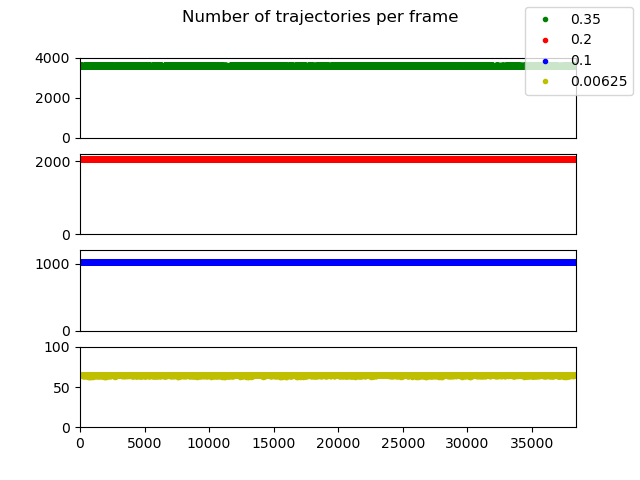

In [15]:
fig = plt.figure()
fig.suptitle('Number of trajectories per frame')
ax = fig.add_subplot(4,1,1)
ax.set_xlim(0,nt)
ax.axes.get_xaxis().set_visible(False)
ax.set_ylim(0,4000)
ax.plot(ntrayec0_35,'.',c='g')
ay = fig.add_subplot(4,1,2)
ay.set_xlim(0,nt)
ay.axes.get_xaxis().set_visible(False)
ay.set_ylim(0,2200)
ay.plot(ntrayec0_2,'.',c='r')
aw = fig.add_subplot(4,1,3)
aw.set_xlim(0,nt)
aw.set_ylim(0,1200)
aw.plot(ntrayec0_1,'.',c='b')
aw.axes.get_xaxis().set_visible(False)
az = fig.add_subplot(4,1,4)
az.set_xlim(0,nt)
az.set_ylim(0,100)
az.plot(ntrayec0_00625,'.',c='y')
fig.legend(['0.35','0.2','0.1','0.00625'],loc='upper right')


# FUNCIÓN PARA SUAVIZAR DETECCIÓN PARTÍCULAS

### Densidad 0.00625

In [9]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.00625_f75Hz.pkl')

In [10]:
data=data.rename(columns={'particle':'track'})

In [27]:
window_length=25
new_df = []
for trajectory in set(data.track):
    sub = data[data.track==trajectory]

    if sub.shape[0] <= window_length+1:
        #Para obviar los casos en los que la trayectoria dura menos que la ventana de suavizado
        pass
    else:
        printp(f'Smoothing velocities for track: {trajectory : .0f}')
        # Savgol filter
        sub['x'] = savgol_filter(sub['x'], window_length=25, polyorder=3, axis=0)
        sub['y'] = savgol_filter(sub['y'], window_length=25, polyorder=3, axis=0)
        new_df.append(sub)

new_df = pd.concat(new_df, axis=0)
new_df = new_df.reset_index(drop=True)


Smoothing velocities for track:  21

/tmp/ipykernel_212337/1239626205.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['x'] = savgol_filter(sub['x'], window_length=25, polyorder=3, axis=0)
/tmp/ipykernel_212337/1239626205.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['y'] = savgol_filter(sub['y'], window_length=25, polyorder=3, axis=0)


Smoothing velocities for track:  66

In [8]:
new_df=new_df.rename(columns={'track':'particle'})

In [55]:
data=data.rename(columns={'track':'particle'})

In [56]:
plt.close(1)

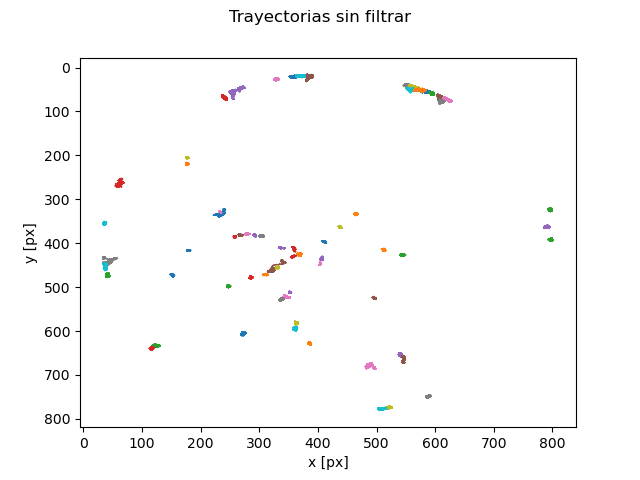

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [57]:
plt.figure()
plt.suptitle('Trayectorias sin filtrar')
tp.plot_traj(data)

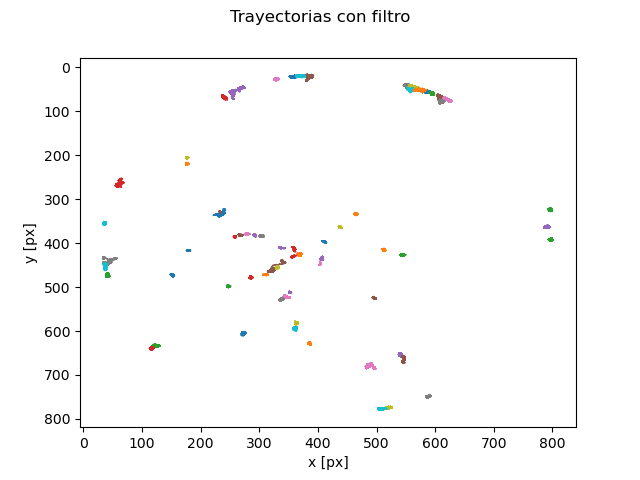

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [11]:
plt.figure()
plt.suptitle('Trayectorias con filtro')
tp.plot_traj(new_df)

In [28]:

def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')

In [13]:
new_df=new_df.rename(columns={'particle':'track'})

In [ ]:
data=data.rename(columns={'particle':'track'})

In [29]:
def tracks_len(df):
    track_list = np.unique(df.track.values) # list of current track_listk IDs
    ntracks = len(track_list)
    lengths = np.array( [len(df[df.track==i]) for i in track_list] ) # length of each track
    return track_list, lengths, ntracks

In [30]:
track_list, lengths, ntracks = tracks_len(new_df)

In [31]:
datavelocfilter=velocity(new_df)

0


In [38]:
new_df5=pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_filter_densidad0.00625_f75Hz.pkl')

In [17]:
datavelocfilter.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocityfilter_densidad0.00625_f75Hz.pkl')

In [64]:
datavelocfilter= pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocityfilter_densidad0.00625_f75Hz.pkl')

In [65]:
dataveloc= pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.00625_f75Hz.pkl')

In [66]:
datavelocfilter=datavelocfilter[['x','y','frame','track','vx','vy','v']]

In [67]:
dataveloc=dataveloc[['x','y','frame','track','vx','vy','v']]

In [68]:
dataveloc=dataveloc[dataveloc.frame>=0]

In [69]:
datavelocfilter.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocityfilter_densidad0.00625_f75Hz.pkl')

In [70]:
dataveloc.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.00625_f75Hz.pkl')

## comprobar velocidades

In [72]:
datavelocfilter[datavelocfilter.track==1]

,x,y,frame,track,vx,vy,v,v2
38418,367.667261,423.687768,0,1,-0.001663,0.005985,0.006212,0.000039
38419,367.668923,423.681783,1,1,-0.047289,0.010050,0.048345,0.002337
38420,367.716212,423.671733,2,1,-0.030191,-0.010816,0.032070,0.001029
38421,367.746404,423.682549,3,1,0.016953,-0.044559,0.047675,0.002273
38422,367.729450,423.727108,4,1,0.028044,-0.060429,0.066619,0.004438
...,...,...,...,...,...,...,...,...
76831,366.442642,427.703986,38413,1,-0.094152,0.036500,0.100980,0.010197
76832,366.536794,427.667487,38414,1,-0.072801,0.037807,0.082033,0.006729
76833,366.609595,427.629680,38415,1,-0.004420,0.014261,0.014930,0.000223
76834,366.614015,427.615419,38416,1,0.050677,-0.012910,0.052295,0.002735


In [75]:
dataveloc[dataveloc.track==1]

,x,y,frame,track,vx,vy,v,v2
38418,367.666922,423.687280,0,1,-0.003356,0.003545,0.004882,0.000024
38419,367.670278,423.683735,1,1,-0.043902,0.014930,0.046371,0.002150
38420,367.714180,423.668805,2,1,-0.042189,-0.012405,0.043975,0.001934
38421,367.756369,423.681210,3,1,0.025494,-0.044298,0.051110,0.002612
38422,367.730874,423.725508,4,1,0.042890,-0.065129,0.077984,0.006081
...,...,...,...,...,...,...,...,...
76831,366.408477,427.699145,38413,1,-0.159448,0.020792,0.160798,0.025856
76832,366.567926,427.678353,38414,1,-0.033159,0.054975,0.064201,0.004122
76833,366.601085,427.623377,38415,1,-0.002183,0.015205,0.015361,0.000236
76834,366.603268,427.608172,38416,1,0.032766,-0.024988,0.041207,0.001698


In [84]:
vx1=new_df5[new_df5.track==1].x.values[0]-new_df5[new_df5.track==1].x.values[1]
vy1=new_df5[new_df5.track==1].y.values[0]-new_df5[new_df5.track==1].y.values[1]
v=math.sqrt(vx1*vx1+vy1*vy1)
v2=vx1*vx1+vy1*vy1
print('vx=', vx1,'vy=', vy1,'v=', v,'v²=', v2)

vx= -0.0016625811203425656 vy= 0.005985189736179564 v= 0.006211817138308946 v²= 3.858667215978874e-05


In [77]:
vx1=data[data.track==1].x.values[0]-data[data.track==1].x.values[1]
print(vx1)

-0.003356345892882473


### histograma // funcion de distribucion para vx y vy

In [71]:
hx00625filter, bordesx00625filter= np.histogram(datavelocfilter['vx'].values,bins=1000)
hy00625filter, bordesy00625filter= np.histogram(datavelocfilter['vy'].values,bins=1000)
h00625filter, bordes00625filter= np.histogram(datavelocfilter['v'].values,bins=1000)

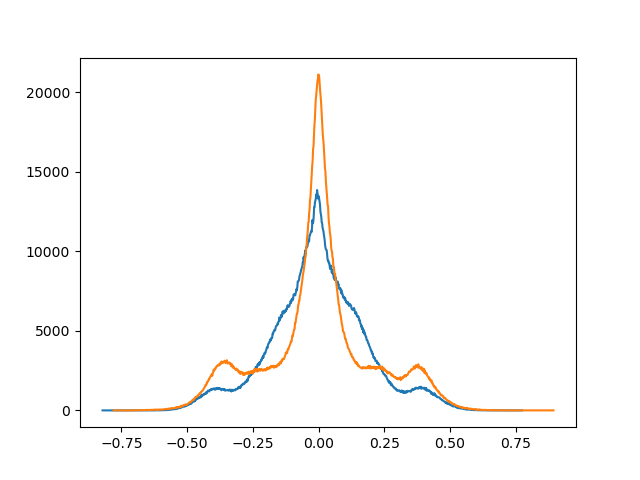

In [8]:
plt.figure()
plt.plot(bordesx00625filter[:-1],hx00625filter)
plt.plot(bordesy00625filter[:-1],hy00625filter)


In [6]:
h00625filter, bordes00625filter= np.histogram(datavelocfilter['v'].values,bins=1000)

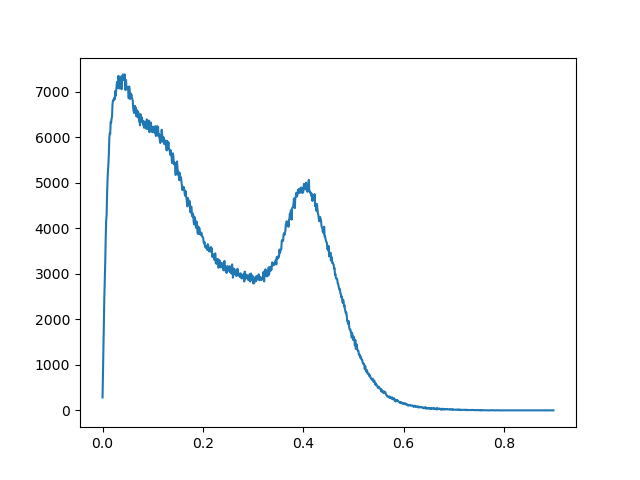

In [9]:
plt.figure()
plt.plot(bordes00625filter[:-1],h00625filter)

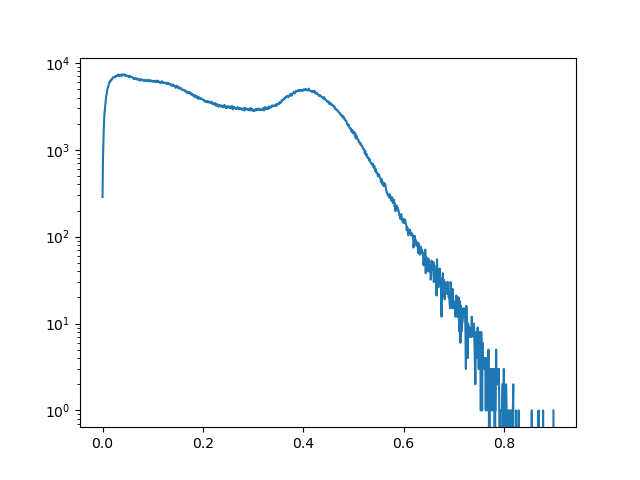

In [10]:
plt.figure()
plt.plot(bordes00625filter[:-1],h00625filter)
plt.yscale('log')

In [72]:
hx00625, bordesx00625= np.histogram(dataveloc['vx'].values,bins=1000)
hy00625, bordesy00625= np.histogram(dataveloc['vy'].values,bins=1000)
h00625, bordes00625= np.histogram(dataveloc['v'].values,bins=1000)

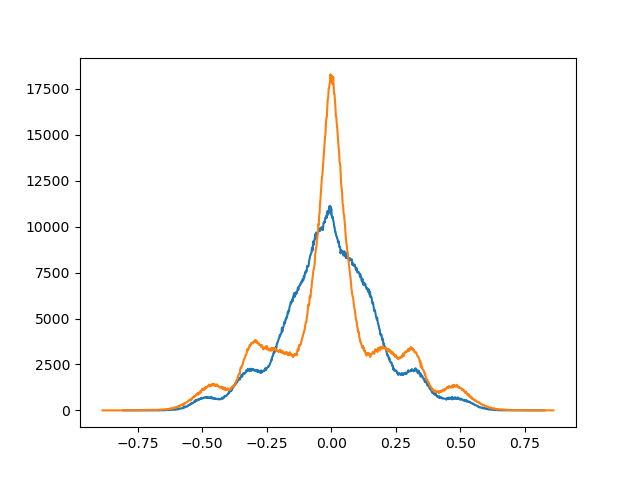

In [19]:
plt.figure()
plt.plot(bordesx00625[:-1],hx00625)
plt.plot(bordesy00625[:-1],hy00625)


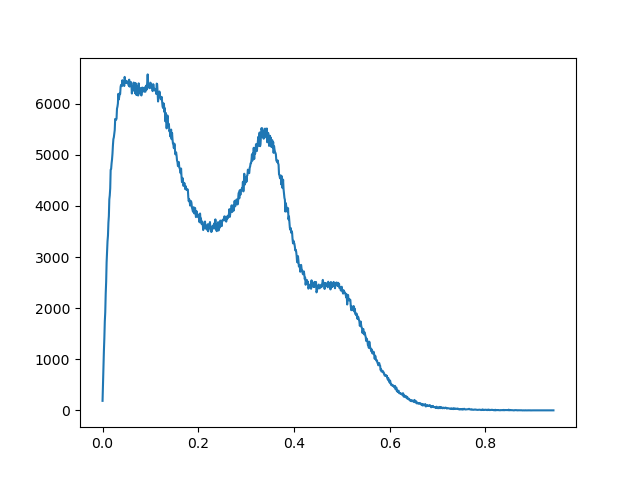

In [13]:
plt.figure()
plt.plot(bordes00625[:-1],h00625)

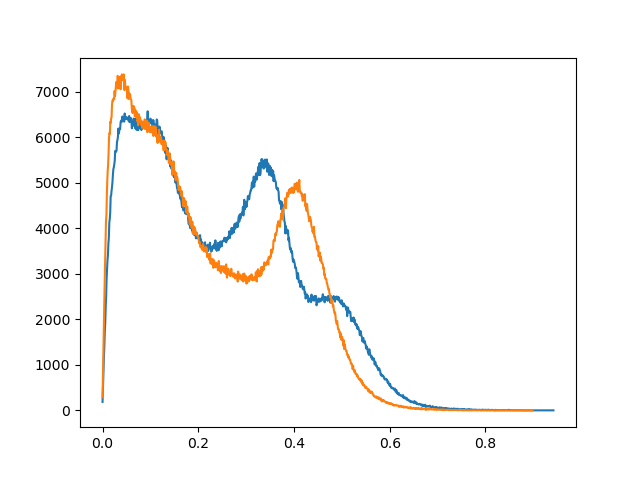

In [14]:
plt.figure()
plt.plot(bordes00625[:-1],h00625)
plt.plot(bordes00625filter[:-1],h00625filter)


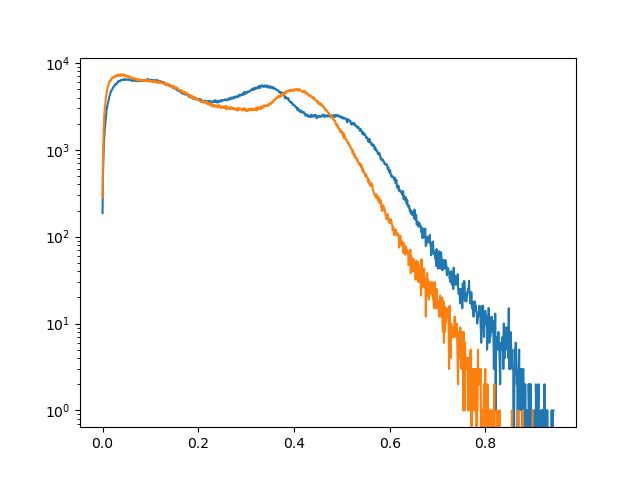

In [15]:
plt.figure()
plt.plot(bordes00625[:-1],h00625)
plt.plot(bordes00625filter[:-1],h00625filter)
plt.yscale('log')


In [28]:
datavelocfilter['v2'].mean()

0.07522032187154538

In [30]:
datavelocfilter[datavelocfilter.frame==1][datavelocfilter.track==0]

/tmp/ipykernel_269214/4272038290.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  datavelocfilter[datavelocfilter.frame==1][datavelocfilter.track==0]


,x,y,frame,track,vx,vy,v,v2
1,360.694732,19.909706,1,0,-0.031377,-0.300058,0.301694,0.091019


In [33]:
varv00625filter=datavelocfilter['v'].var(ddof=0)
varv00625=dataveloc['v'].var(ddof=0)

run 'plot.close(t_id)' when finished



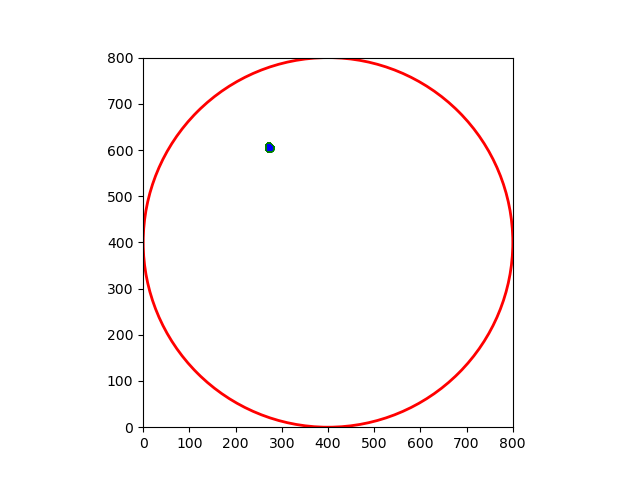

In [52]:
plot_track(new_df,data,20)

run 'plot.close(t_id)' when finished



/tmp/ipykernel_212337/335166604.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_track2(new_df[new_df.frame<1100][new_df.frame>1000],data[data.frame<1100][data.frame>1000],1)


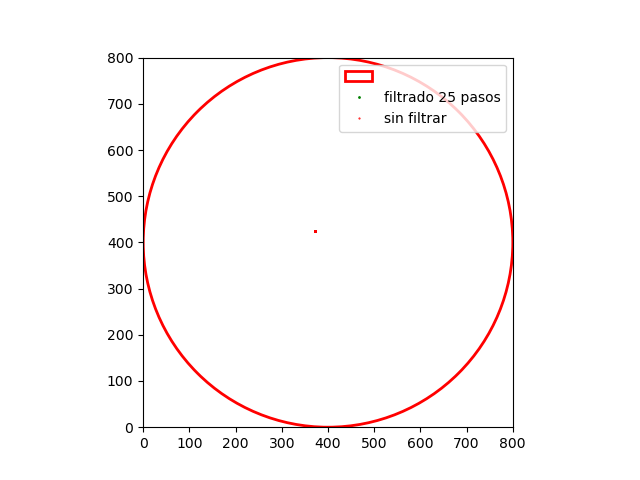

In [52]:
plt.close(1)
plot_track2(new_df[new_df.frame<1100][new_df.frame>1000],data[data.frame<1100][data.frame>1000],1)
plt.legend(['','filtrado 25 pasos','sin filtrar'],loc='upper right')

run 'plot.close(t_id)' when finished



/tmp/ipykernel_212337/2922102087.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_track2(new_df5[new_df5.frame<1100][new_df5.frame>1000],data[data.frame<1100][data.frame>1000],1)


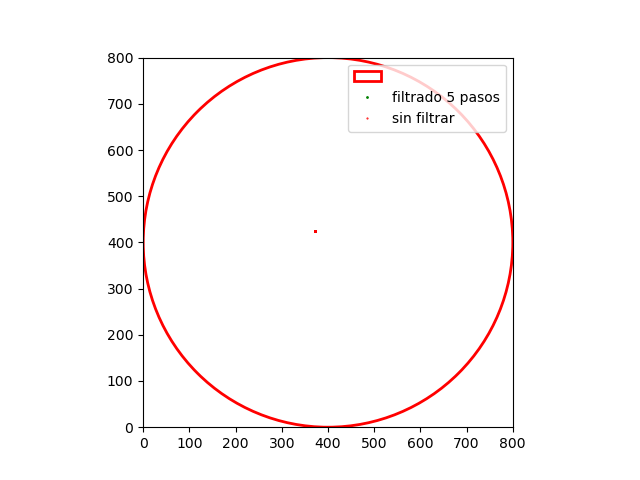

In [53]:
plt.close(1)
plot_track2(new_df5[new_df5.frame<1100][new_df5.frame>1000],data[data.frame<1100][data.frame>1000],1)
plt.legend(['','filtrado 5 pasos','sin filtrar'],loc='upper right')

run 'plot.close(t_id)' when finished



/tmp/ipykernel_212337/666355509.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_track2(new_df5[new_df5.frame<1100][new_df5.frame>1000],new_df[new_df.frame<1100][new_df.frame>1000],1)


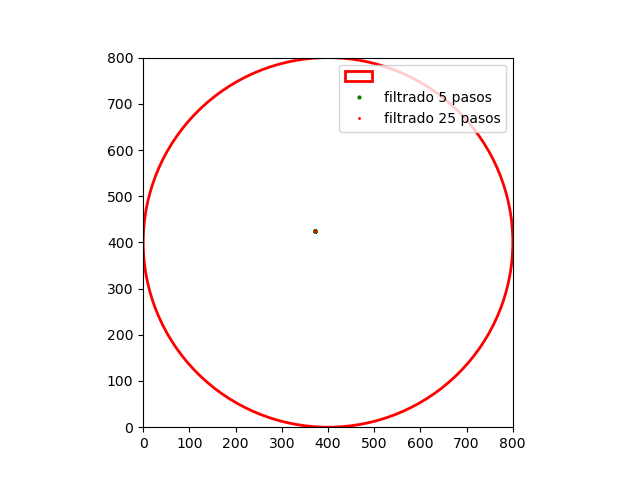

In [58]:
plt.close(1)
plot_track2(new_df5[new_df5.frame<1100][new_df5.frame>1000],new_df[new_df.frame<1100][new_df.frame>1000],1)
plt.legend(['','filtrado 5 pasos','filtrado 25 pasos'],loc='upper right')

run 'plot.close(t_id)' when finished



/tmp/ipykernel_212337/2285462388.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_track3(data[data.frame<1100][data.frame>1000],new_df5[new_df5.frame<1100][new_df5.frame>1000],new_df[new_df.frame<1100][new_df.frame>1000],1)


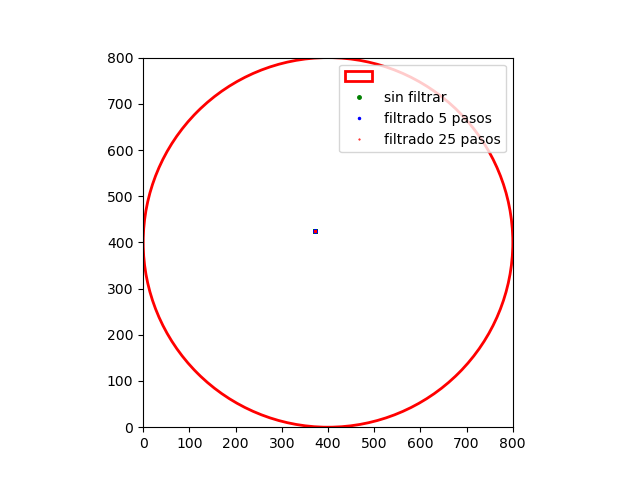

In [57]:
plt.close(1)
plot_track3(data[data.frame<1100][data.frame>1000],new_df5[new_df5.frame<1100][new_df5.frame>1000],new_df[new_df.frame<1100][new_df.frame>1000],1)
plt.legend(['','sin filtrar','filtrado 5 pasos','filtrado 25 pasos'],loc='upper right')

In [89]:
posxfilter=new_df[new_df.track==10].x.values
posx=data[data.track==10].x.values

In [88]:
t=data[data.track==10].frame.values
tfilter=new_df[new_df.track==10].frame.values

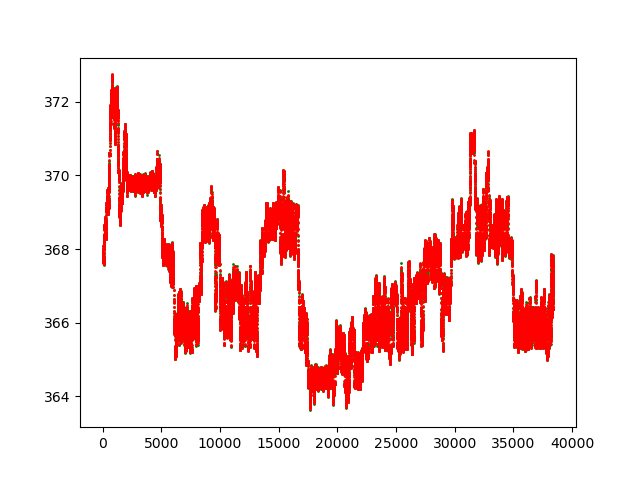

In [87]:
plt.figure()
plt.scatter(t,posx,s=1,c='g')
plt.scatter(t,posxfilter,s=1,c='r')

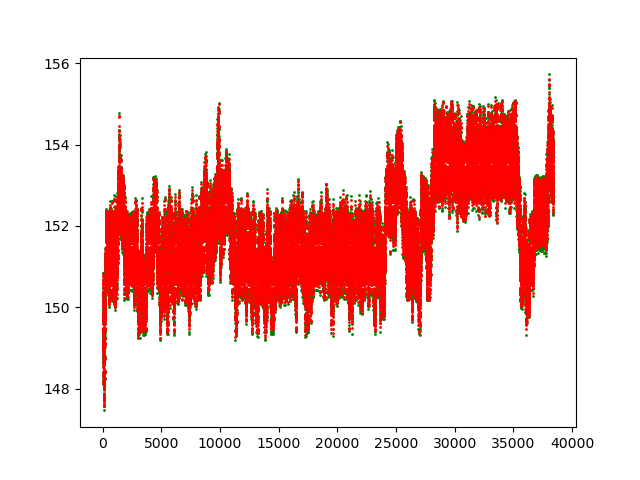

In [90]:
plt.figure()
plt.scatter(t,posx,s=1,c='g')
plt.scatter(tfilter,posxfilter,s=1,c='r')

In [74]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.00625filter.txt',bordes00625filter)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.00625filter.txt',h00625filter)

In [73]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.00625.txt',bordes00625)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.00625.txt',h00625)

## Densidad 0.1

In [93]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.1_f75Hz.pkl')

In [95]:
data=data.rename(columns={'particle':'track'})

In [96]:
window_length=5
new_df = []
for trajectory in set(data.track):
    sub = data[data.track==trajectory]

    if sub.shape[0] <= window_length+1:
        #Para obviar los casos en los que la trayectoria dura menos que la ventana de suavizado
        pass
    else:
        printp(f'Smoothing velocities for track: {trajectory : .0f}')
        # Savgol filter
        sub['x'] = savgol_filter(sub['x'], window_length=5, polyorder=3, axis=0)
        sub['y'] = savgol_filter(sub['y'], window_length=5, polyorder=3, axis=0)
        new_df.append(sub)

new_df = pd.concat(new_df, axis=0)
new_df = new_df.reset_index(drop=True)


Smoothing velocities for track:  6

/tmp/ipykernel_165394/1128149397.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['x'] = savgol_filter(sub['x'], window_length=5, polyorder=3, axis=0)
/tmp/ipykernel_165394/1128149397.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['y'] = savgol_filter(sub['y'], window_length=5, polyorder=3, axis=0)


Smoothing velocities for track:  1210

In [97]:
new_df=new_df.rename(columns={'track':'particle'})

In [ ]:
data=data.rename(columns={'track':'particle'})

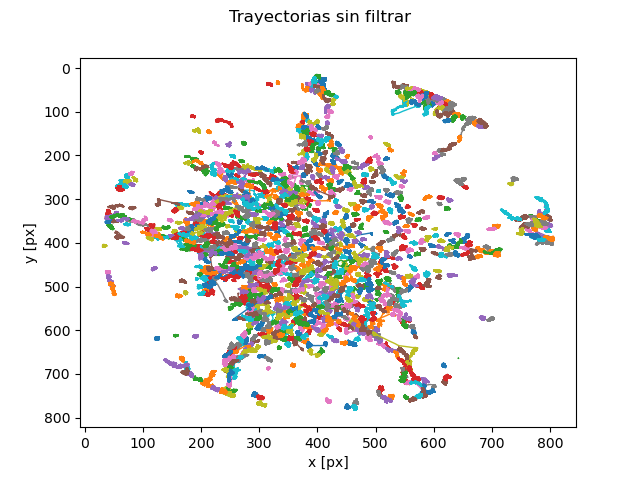

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [94]:
plt.figure()
plt.suptitle('Trayectorias sin filtrar')
tp.plot_traj(data)

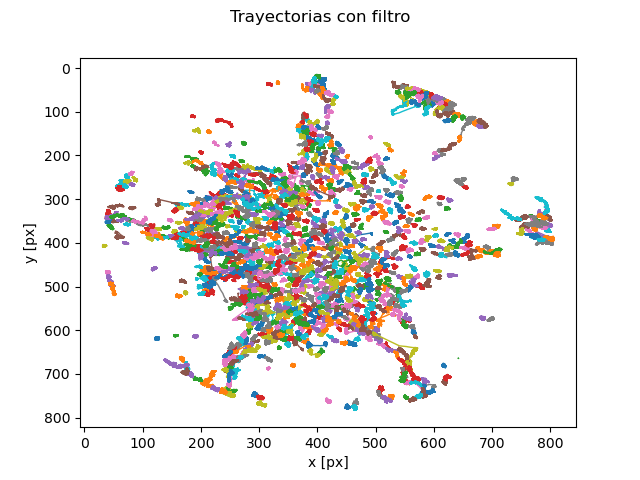

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [98]:
plt.figure()
plt.suptitle('Trayectorias con filtro')
tp.plot_traj(new_df)

In [103]:

def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')

In [99]:
new_df=new_df.rename(columns={'particle':'track'})

In [100]:
data=data.rename(columns={'particle':'track'})

In [102]:
new_df.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_filter_densidad0.1_f75Hz.pkl')

In [104]:
def tracks_len(df):
    track_list = np.unique(df.track.values) # list of current track_listk IDs
    ntracks = len(track_list)
    lengths = np.array( [len(df[df.track==i]) for i in track_list] ) # length of each track
    return track_list, lengths, ntracks

In [105]:
track_list, lengths, ntracks = tracks_len(new_df)

In [106]:
nt = np.max(new_df.frame.values)

In [107]:
datavelocfilter=velocity(new_df)

0
100
200
300
400
500
600
700
800
900
1000
1100


In [ ]:
datavelocfilter

In [45]:
datavelocfilter.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocityfilter_densidad0.1_f75Hz.pkl')

In [52]:
dataveloc = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.1_f75Hz.pkl')

In [43]:
datavelocfilter= pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocityfilter_densidad0.1_f75Hz.pkl')


In [44]:
datavelocfilter=datavelocfilter[['x','y','frame','track','vx','vy','v']]

In [53]:
dataveloc=dataveloc[['x','y','frame','track','vx','vy','v']]

In [54]:
dataveloc=dataveloc[dataveloc.frame>=0]

In [55]:
dataveloc.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.1_f75Hz.pkl')

### histograma // funcion de distribucion para vx y vy

In [46]:
hx01filter, bordesx01filter= np.histogram(datavelocfilter['vx'].values,bins=1000)
hy01filter, bordesy01filter= np.histogram(datavelocfilter['vy'].values,bins=1000)

(-0.5, 0.5)

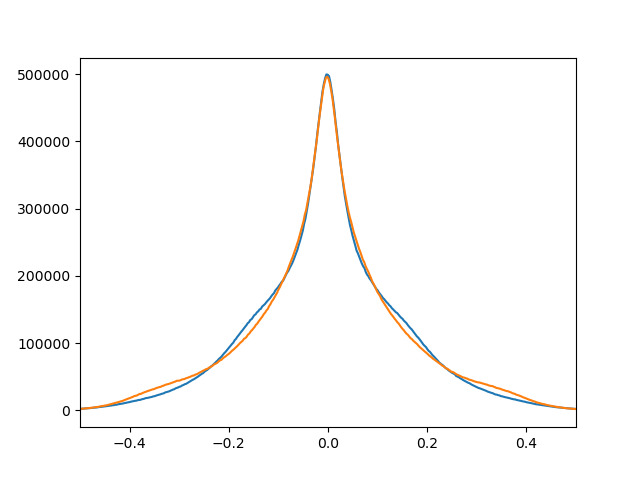

In [47]:
plt.figure()
plt.plot(bordesx01filter[:-1],hx01filter)
plt.plot(bordesy01filter[:-1],hy01filter)
plt.xlim(-0.5,0.5)
#plt.yscale('log')


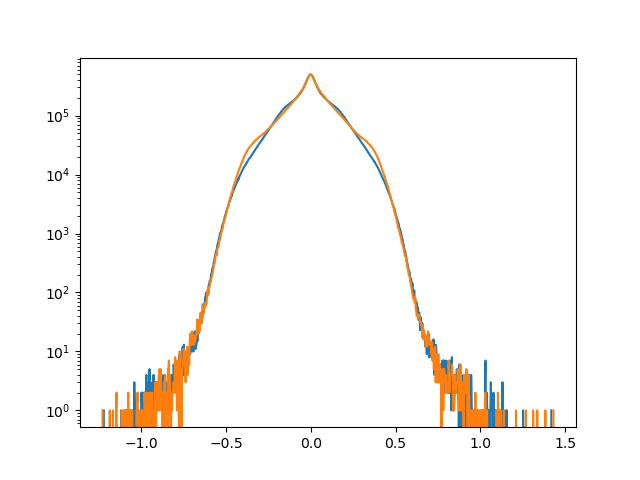

In [48]:
plt.figure()
plt.plot(bordesx01filter[:-1],hx01filter)
plt.plot(bordesy01filter[:-1],hy01filter)
#plt.xlim(-0.5,0.5)
plt.yscale('log')


In [49]:
h01filter, bordes01filter=np.histogram(datavelocfilter['v'].values,bins=1000)

(0.0, 0.6)

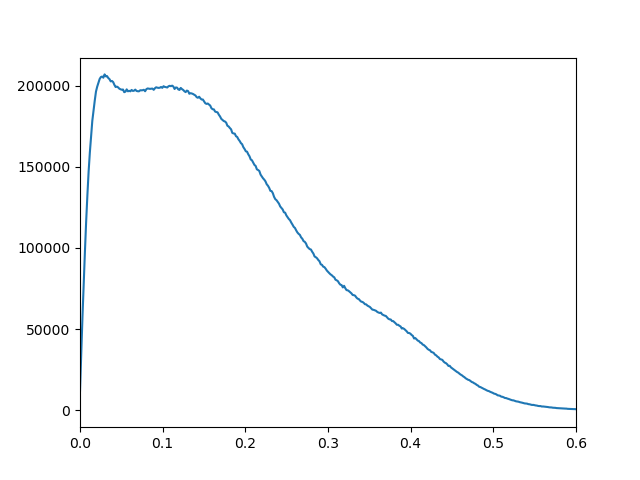

In [50]:
plt.figure()
plt.plot(bordes01filter[:-1],h01filter)
plt.xlim(0,0.6)

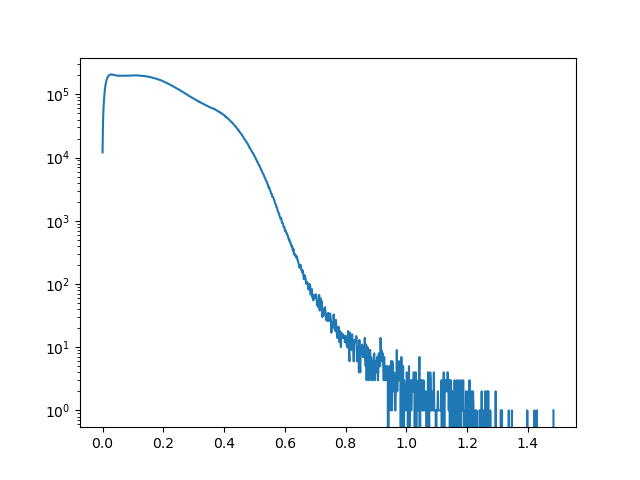

In [51]:
plt.figure()
plt.plot(bordes01filter[:-1],h01filter)
plt.yscale('log')
#plt.xlim(0,0.6)

In [56]:
hx01, bordesx01= np.histogram(dataveloc['vx'].values,bins=1000)
hy01, bordesy01= np.histogram(dataveloc['vy'].values,bins=1000)

/tmp/ipykernel_317290/893882104.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


(-0.5, 0.5)

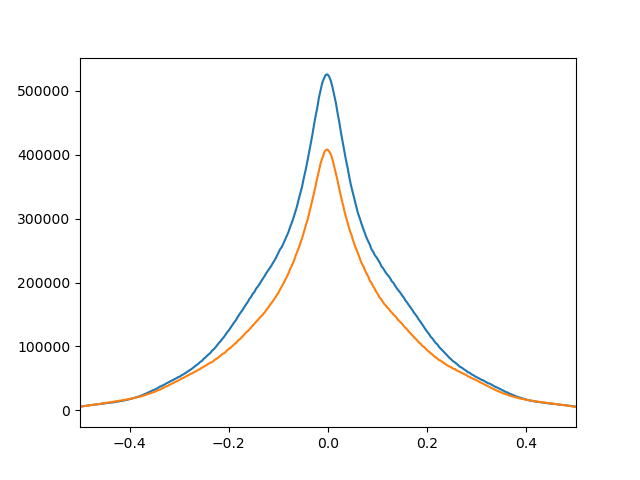

In [57]:
plt.figure()
plt.plot(bordesx01[:-1],hx01)
plt.plot(bordesy01[:-1],hy01)
plt.xlim(-0.5,0.5)


In [58]:
h01, bordes01=np.histogram(dataveloc['v'].values,bins=1000)

(0.0, 0.6)

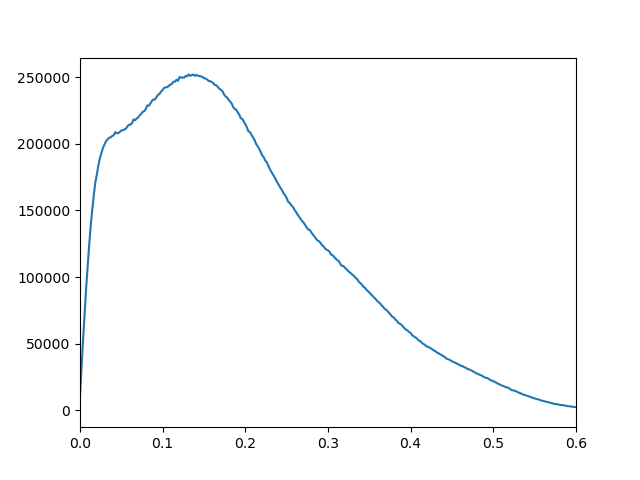

In [59]:
plt.figure()
plt.plot(bordes01[:-1],h01)
plt.xlim(0,0.6)

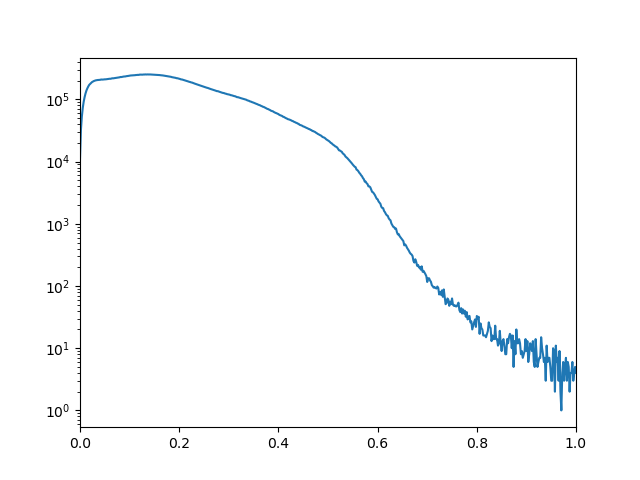

In [60]:
plt.figure()
plt.plot(bordes01[:-1],h01)
plt.xlim(0,1)
plt.yscale('log')

(0.0, 0.6)

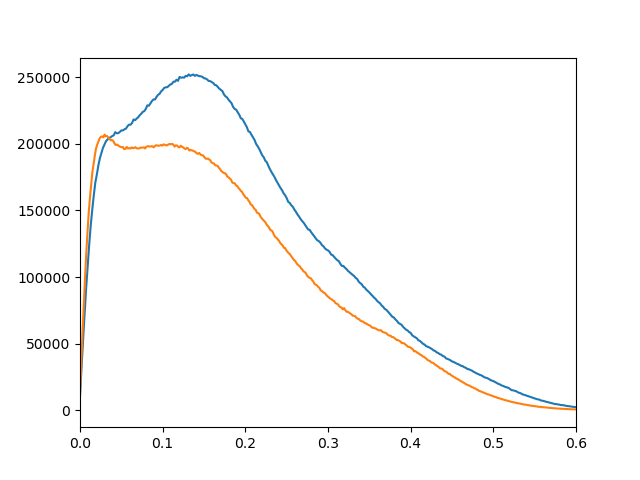

In [61]:
plt.figure()
plt.plot(bordes01[:-1],h01)
plt.plot(bordes01filter[:-1],h01filter)
plt.xlim(0,0.6)


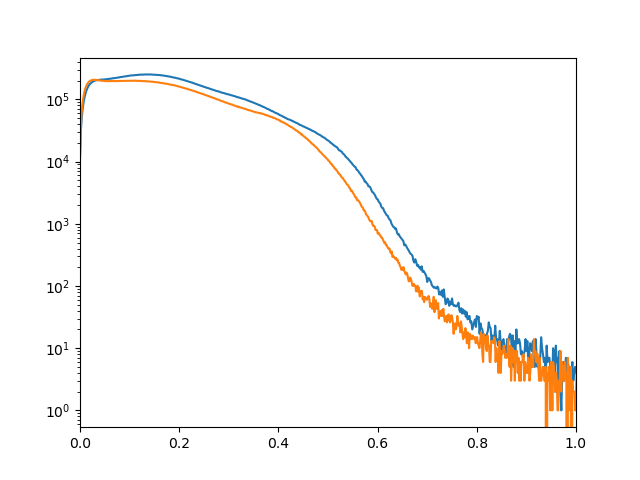

In [62]:
plt.figure()
plt.plot(bordes01[:-1],h01)
plt.plot(bordes01filter[:-1],h01filter)
plt.xlim(0,1)
plt.yscale('log')


In [25]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.1filter.txt',bordes01filter)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.1filter.txt',h01filter)

In [63]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.1.txt',bordes01)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.1.txt',h01)

## Densidad 0.2

In [16]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.2_f75Hz.pkl')

In [17]:
data=data.rename(columns={'particle':'track'})

In [18]:
window_length=5
new_df = []
for trajectory in set(data.track):
    sub = data[data.track==trajectory]

    if sub.shape[0] <= window_length+1:
        #Para obviar los casos en los que la trayectoria dura menos que la ventana de suavizado
        pass
    else:
        printp(f'Smoothing velocities for track: {trajectory : .0f}')
        # Savgol filter
        sub['x'] = savgol_filter(sub['x'], window_length=5, polyorder=3, axis=0)
        sub['y'] = savgol_filter(sub['y'], window_length=5, polyorder=3, axis=0)
        new_df.append(sub)

new_df = pd.concat(new_df, axis=0)
new_df = new_df.reset_index(drop=True)


Smoothing velocities for track:  3

/tmp/ipykernel_185712/1128149397.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['x'] = savgol_filter(sub['x'], window_length=5, polyorder=3, axis=0)
/tmp/ipykernel_185712/1128149397.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['y'] = savgol_filter(sub['y'], window_length=5, polyorder=3, axis=0)


Smoothing velocities for track:  2657

In [6]:
new_df = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_filter_densidad0.2_f75Hz.pkl')

In [19]:
new_df.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_filter_densidad0.2_f75Hz.pkl')

In [ ]:
new_df=new_df.rename(columns={'track':'particle'})

In [ ]:
data=data.rename(columns={'track':'particle'})

In [ ]:
plt.figure()
plt.suptitle('Trayectorias sin filtrar')
tp.plot_traj(data)

In [ ]:
plt.figure()
plt.suptitle('Trayectorias con filtro')
tp.plot_traj(new_df)

In [11]:

def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')

In [ ]:
new_df=new_df.rename(columns={'particle':'track'})

In [ ]:
data=data.rename(columns={'particle':'track'})

In [7]:
def tracks_len(df):
    track_list = np.unique(df.track.values) # list of current track_listk IDs
    ntracks = len(track_list)
    lengths = np.array( [len(df[df.track==i]) for i in track_list] ) # length of each track
    return track_list, lengths, ntracks

In [8]:
track_list, lengths, ntracks = tracks_len(new_df)

In [9]:
nt = np.max(new_df.frame.values)

In [12]:
datavelocfilter=velocity(new_df)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300


In [73]:
datavelocfilter.track.nunique()

2176

In [74]:
dataveloc.track.nunique()

2607

In [20]:
datavelocfilter.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocityfilter_densidad0.2_f75Hz.pkl')

In [31]:
dataveloc = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.2_f75Hz.pkl')

In [18]:
datavelocfilter= pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocityfilter_densidad0.2_f75Hz.pkl')


In [19]:
datavelocfilter=datavelocfilter[['x','y','frame','track','vx','vy','v']]

In [33]:
dataveloc=dataveloc[dataveloc.frame>=0]

In [32]:
dataveloc=dataveloc[['x','y','frame','track','vx','vy','v']]

In [34]:
dataveloc.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.2_f75Hz.pkl')

### histograma // funcion de distribucion para vx y vy

In [21]:
hx02filter, bordesx02filter= np.histogram(datavelocfilter['vx'].values,bins=1000)
hy02filter, bordesy02filter= np.histogram(datavelocfilter['vy'].values,bins=1000)

(-0.6, 0.6)

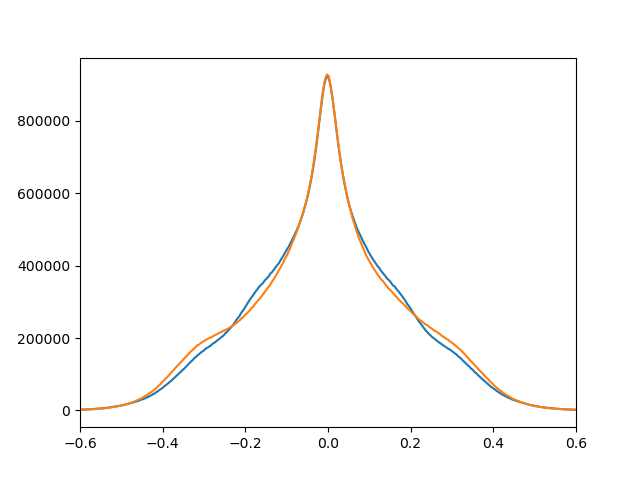

In [26]:
plt.figure()
plt.plot(bordesx02filter[:-1],hx02filter)
plt.plot(bordesy02filter[:-1],hy02filter)
plt.xlim(-0.6,0.6)


In [23]:
h02filter, bordes02filter=np.histogram(datavelocfilter['v'].values,bins=1000)

(0.0, 0.6)

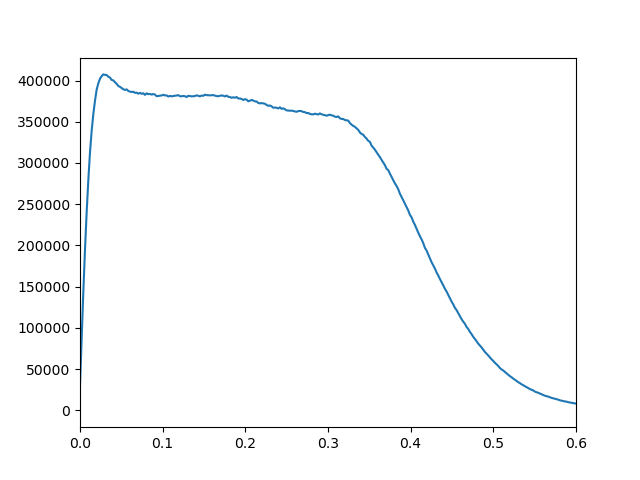

In [27]:
plt.figure()
plt.plot(bordes02filter[:-1],h02filter)
plt.xlim(0,0.6)

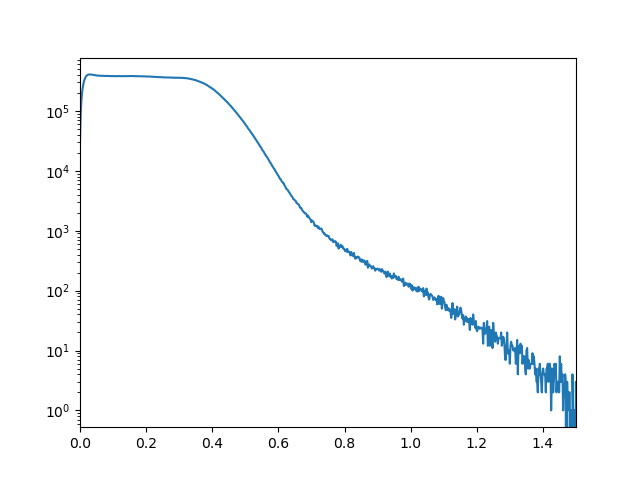

In [30]:
plt.figure()
plt.plot(bordes02filter[:-1],h02filter)
plt.xlim(0,1.5)
plt.yscale('log')

In [35]:
hx02, bordesx02= np.histogram(dataveloc['vx'].values,bins=1000)
hy02, bordesy02= np.histogram(dataveloc['vy'].values,bins=1000)

(-0.6, 0.6)

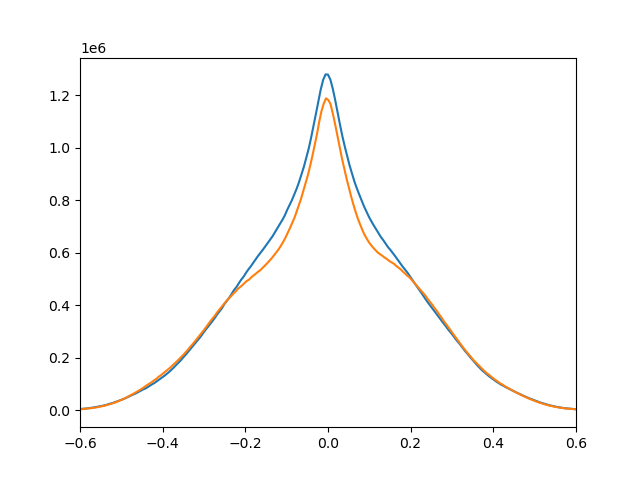

In [36]:
plt.figure()
plt.plot(bordesx02[:-1],hx02)
plt.plot(bordesy02[:-1],hy02)
plt.xlim(-0.6,0.6)


In [37]:
h02, bordes02=np.histogram(dataveloc['v'].values,bins=1000)

(0.0, 0.6)

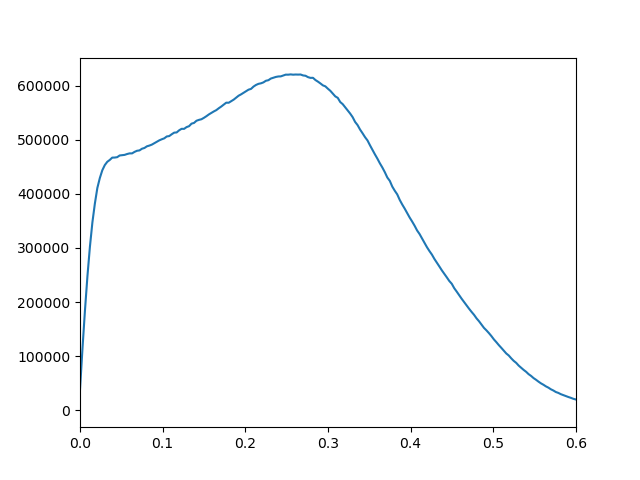

In [38]:
plt.figure()
plt.plot(bordes02[:-1],h02)
plt.xlim(0,0.6)

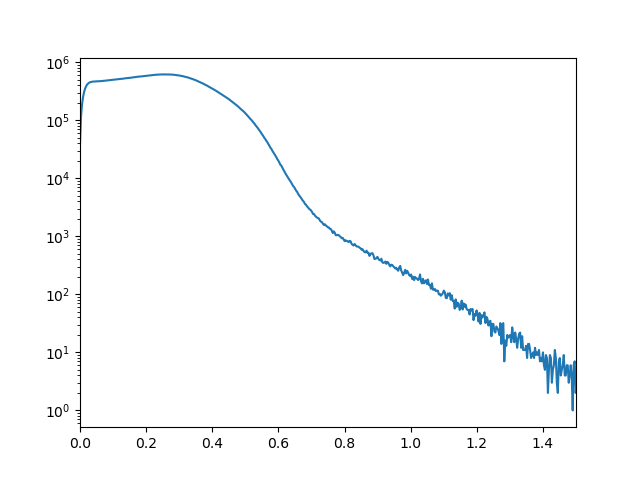

In [39]:
plt.figure()
plt.plot(bordes02[:-1],h02)
plt.xlim(0,1.5)
plt.yscale('log')

(0.0, 0.6)

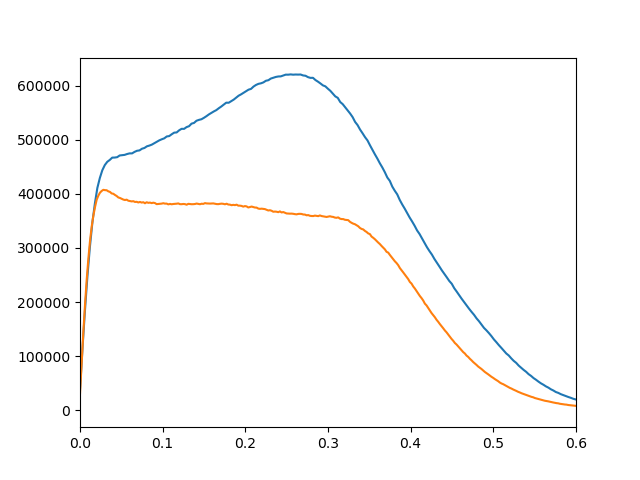

In [40]:
plt.figure()
plt.plot(bordes02[:-1],h02)
plt.plot(bordes02filter[:-1],h02filter)
plt.xlim(0,0.6)


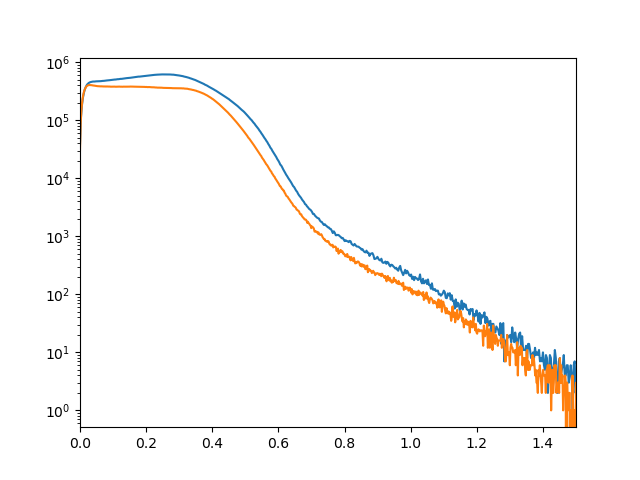

In [41]:
plt.figure()
plt.plot(bordes02[:-1],h02)
plt.plot(bordes02filter[:-1],h02filter)
plt.xlim(0,1.5)
plt.yscale('log')

In [25]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.2filter.txt',bordes02filter)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.2filter.txt',h02filter)

In [42]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.2.txt',bordes02)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.2.txt',h02)

## Densidad 0.35

In [4]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.35_f75Hz.pkl')

In [ ]:
data

In [5]:
data=data.rename(columns={'particle':'track'})

In [6]:
window_length=5
new_df = []
for trajectory in set(data.track):
    sub = data[data.track==trajectory]

    if sub.shape[0] <= window_length+1:
        #Para obviar los casos en los que la trayectoria dura menos que la ventana de suavizado
        pass
    else:
        printp(f'Smoothing velocities for track: {trajectory : .0f}')
        # Savgol filter
        sub['x'] = savgol_filter(sub['x'], window_length=5, polyorder=3, axis=0)
        sub['y'] = savgol_filter(sub['y'], window_length=5, polyorder=3, axis=0)
        new_df.append(sub)

new_df = pd.concat(new_df, axis=0)
new_df = new_df.reset_index(drop=True)


Smoothing velocities for track:  2

/tmp/ipykernel_201371/1128149397.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['x'] = savgol_filter(sub['x'], window_length=5, polyorder=3, axis=0)
/tmp/ipykernel_201371/1128149397.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['y'] = savgol_filter(sub['y'], window_length=5, polyorder=3, axis=0)


Smoothing velocities for track:  12154

In [7]:
new_df.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_filter_densidad0.35_f75Hz.pkl')

In [6]:

def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
#        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')

In [7]:
def tracks_len(df):
    track_list = np.unique(df.track.values) # list of current track_listk IDs
    ntracks = len(track_list)
    lengths = np.array( [len(df[df.track==i]) for i in track_list] ) # length of each track
    return track_list, lengths, ntracks

In [8]:
track_list, lengths, ntracks = tracks_len(new_df)

In [9]:
nt = np.max(new_df.frame.values)

In [5]:
new_df = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinkedfilter_densidad0.35_f75Hz.pkl')

In [10]:
datavelocfilter=velocity(new_df)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500


In [11]:
datavelocfilter.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocityfilter_densidad0.35_f75Hz.pkl')

In [12]:
dataveloc = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.35_f75Hz.pkl')


In [5]:
datavelocfilter= pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocityfilter_densidad0.35_f75Hz.pkl')


In [10]:
dataveloc.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.35_f75Hz.pkl')

In [9]:
dataveloc=dataveloc[dataveloc.frame>=0]

### histograma // funcion de distribucion para vx y vy

In [12]:
hx035filter, bordesx035filter= np.histogram(datavelocfilter['vx'].values,bins=1000)
hy035filter, bordesy035filter= np.histogram(datavelocfilter['vy'].values,bins=1000)

(-0.4, 0.4)

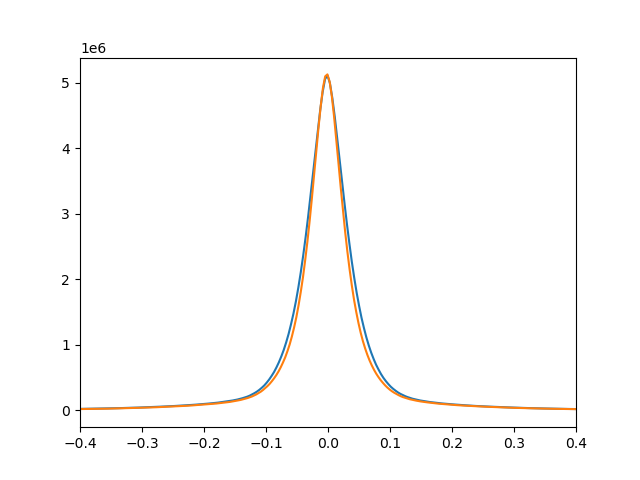

In [13]:
plt.figure()
plt.plot(bordesx035filter[:-1],hx035filter)
plt.plot(bordesy035filter[:-1],hy035filter)
plt.xlim(-0.4,0.4)


In [14]:
h035filter, bordes035filter=np.histogram(datavelocfilter['v'].values,bins=1000)

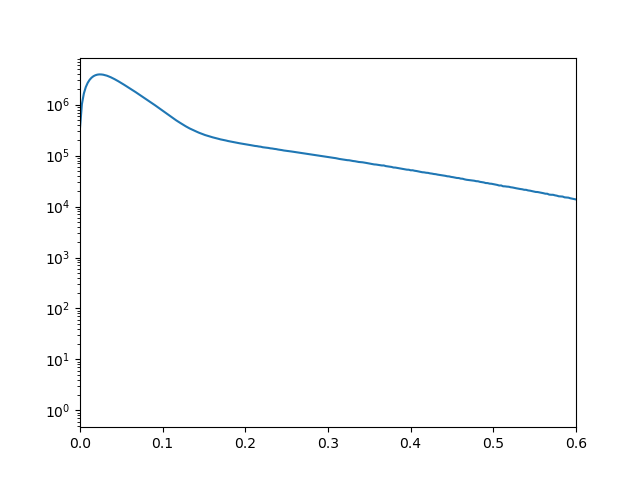

In [15]:
plt.figure()
plt.plot(bordes035filter[:-1],h035filter)
plt.xlim(0,0.6)
plt.yscale('log')

(0.0, 0.6)

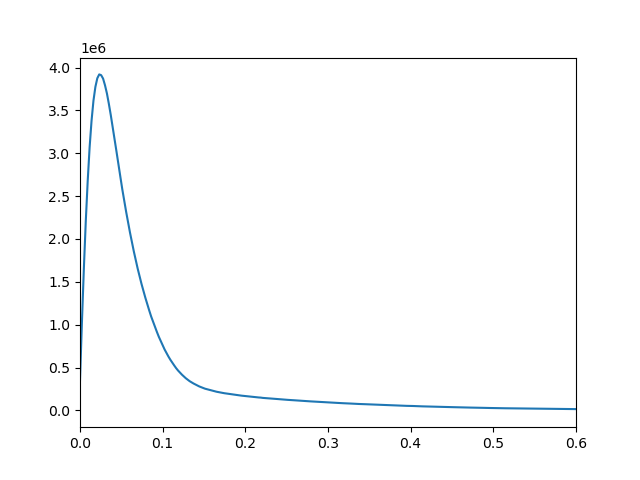

In [16]:
plt.figure()
plt.plot(bordes035filter[:-1],h035filter)
plt.xlim(0,0.6)
#plt.yscale('log')

In [17]:
hx035, bordesx035= np.histogram(dataveloc['vx'].values,bins=1000)
hy035, bordesy035= np.histogram(dataveloc['vy'].values,bins=1000)

NameError: name 'dataveloc' is not defined

(-0.4, 0.4)

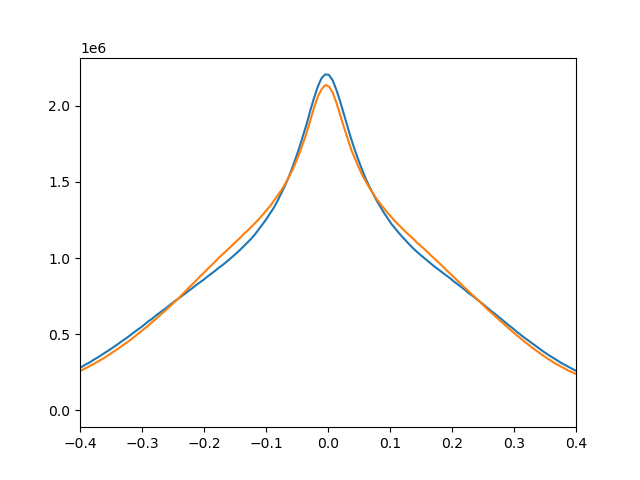

In [22]:
plt.figure()
plt.plot(bordesx035[:-1],hx035)
plt.plot(bordesy035[:-1],hy035)
plt.xlim(-0.4,0.4)


In [23]:
h035, bordes035=np.histogram(dataveloc['v'].values,bins=1000)

(0.0, 0.6)

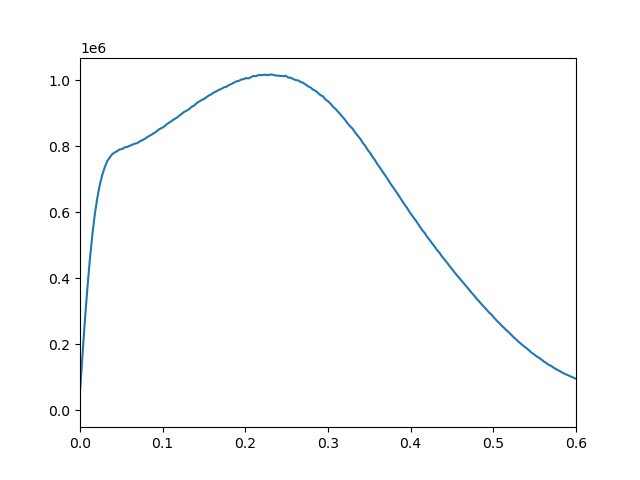

In [24]:
plt.figure()
plt.plot(bordes035[:-1],h035)
plt.xlim(0,0.6)

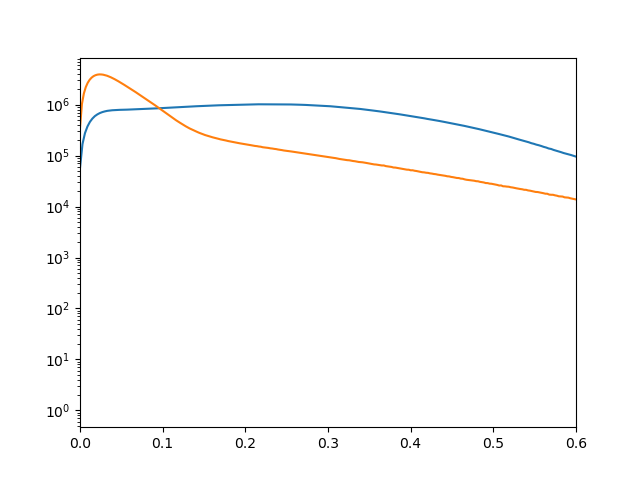

In [25]:
plt.figure()
plt.plot(bordes035[:-1],h035)
plt.plot(bordes035filter[:-1],h035filter)
plt.xlim(0,0.6)
plt.yscale('log')


In [26]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.35filter.txt',bordes035filter)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.35filter.txt',h035filter)

In [27]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.35.txt',bordes035)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.35.txt',h035)

## Densidad 0.3

In [5]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.3_f75Hz.pkl')

In [ ]:
data

In [6]:
data=data.rename(columns={'particle':'track'})

In [7]:
window_length=5
new_df = []
for trajectory in set(data.track):
    sub = data[data.track==trajectory]

    if sub.shape[0] <= window_length+1:
        #Para obviar los casos en los que la trayectoria dura menos que la ventana de suavizado
        pass
    else:
        printp(f'Smoothing velocities for track: {trajectory : .0f}')
        # Savgol filter
        sub['x'] = savgol_filter(sub['x'], window_length=5, polyorder=3, axis=0)
        sub['y'] = savgol_filter(sub['y'], window_length=5, polyorder=3, axis=0)
        new_df.append(sub)

new_df = pd.concat(new_df, axis=0)
new_df = new_df.reset_index(drop=True)


Smoothing velocities for track:  3

/tmp/ipykernel_108995/1128149397.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['x'] = savgol_filter(sub['x'], window_length=5, polyorder=3, axis=0)
/tmp/ipykernel_108995/1128149397.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['y'] = savgol_filter(sub['y'], window_length=5, polyorder=3, axis=0)


Smoothing velocities for track:  6807

In [8]:
new_df.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_filter_densidad0.3_f75Hz.pkl')

In [9]:

def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
#        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')

In [10]:
def tracks_len(df):
    track_list = np.unique(df.track.values) # list of current track_listk IDs
    ntracks = len(track_list)
    lengths = np.array( [len(df[df.track==i]) for i in track_list] ) # length of each track
    return track_list, lengths, ntracks

In [11]:
track_list, lengths, ntracks = tracks_len(new_df)

In [12]:
nt = np.max(new_df.frame.values)

In [13]:
datavelocfilter=velocity(new_df)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700


In [14]:
datavelocfilter.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocityfilter_densidad0.3_f75Hz.pkl')

## Densidad 0.4

In [4]:
data = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_densidad0.4_f75Hz.pkl')

In [ ]:
data

In [5]:
data=data.rename(columns={'particle':'track'})

In [6]:
window_length=5
new_df = []
for trajectory in set(data.track):
    sub = data[data.track==trajectory]

    if sub.shape[0] <= window_length+1:
        #Para obviar los casos en los que la trayectoria dura menos que la ventana de suavizado
        pass
    else:
        printp(f'Smoothing velocities for track: {trajectory : .0f}')
        # Savgol filter
        sub['x'] = savgol_filter(sub['x'], window_length=5, polyorder=3, axis=0)
        sub['y'] = savgol_filter(sub['y'], window_length=5, polyorder=3, axis=0)
        new_df.append(sub)

new_df = pd.concat(new_df, axis=0)
new_df = new_df.reset_index(drop=True)


Smoothing velocities for track:  2

/tmp/ipykernel_263177/1128149397.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['x'] = savgol_filter(sub['x'], window_length=5, polyorder=3, axis=0)
/tmp/ipykernel_263177/1128149397.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['y'] = savgol_filter(sub['y'], window_length=5, polyorder=3, axis=0)


Smoothing velocities for track:  42724

In [7]:
new_df.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_filter_densidad0.4_f75Hz.pkl')

In [6]:

def velocity(df):
    out=pd.DataFrame()
    for i in range(ntracks):
        sub=df[df.track==i]
        vxvy = sub[['x','y']].diff(periods=-1)
        v=(vxvy.x**2+vxvy.y**2)**(0.5)
        v2=v**2
        sub=sub[:-1]
        sub['vx']=vxvy.x
        sub['vy']=vxvy.y
        sub['v']=v
#        sub['v2']=v2
        out=pd.concat([out,sub],ignore_index=True)
        if i%100==0:
            print(i)
    return out

def v2media(vel):
#    vel=vel[vel.v<1];  # falta aclarar si esto es necesario
    #v2media=np.zeros(nt);
    v2media=pd.DataFrame();
    for i in range(nt):
        #v2media[i]=vel[vel.frame==i][['v2']].mean(axis=0)[0]
        vmedia=vel[vel.frame==i][['v2']].mean(axis=0)
        v2media=pd.concat([v2media,vmedia],ignore_index=True)
    return v2media

def v2plot(v2media):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('<v²> in each frame')
    ax.set_xlim(0,nt)
    ax.plot(v2media, '.', c='b')

In [7]:
def tracks_len(df):
    track_list = np.unique(df.track.values) # list of current track_listk IDs
    ntracks = len(track_list)
    lengths = np.array( [len(df[df.track==i]) for i in track_list] ) # length of each track
    return track_list, lengths, ntracks

In [9]:
track_list, lengths, ntracks = tracks_len(data)

In [10]:
nt = np.max(data.frame.values)

In [11]:
new_df.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinkedfilter_densidad0.4_f75Hz.pkl')

In [4]:
new_df = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datalinked_filter_densidad0.4_f75Hz.pkl')

In [9]:
datavelocfilter=velocity(new_df)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [ ]:
dataveloc=velocity(data)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300


In [12]:
datavelocfilter

NameError: name 'datavelocfilter' is not defined

In [10]:
datavelocfilter.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocityfilter_densidad0.4_f75Hz.pkl')

In [ ]:
dataveloc.to_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocity_densidad0.4_f75Hz.pkl')

In [4]:
datavelocfilter = pd.read_pickle('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/datavelocityfilter_densidad0.4_f75Hz.pkl')


In [ ]:
df=dataveloc[dataveloc.frame>=0]

In [ ]:
df

### histograma // funcion de distribucion para vx y vy

In [5]:
hx04filter, bordesx04filter= np.histogram(datavelocfilter['vx'].values,bins=1000)
hy04filter, bordesy04filter= np.histogram(datavelocfilter['vy'].values,bins=1000)

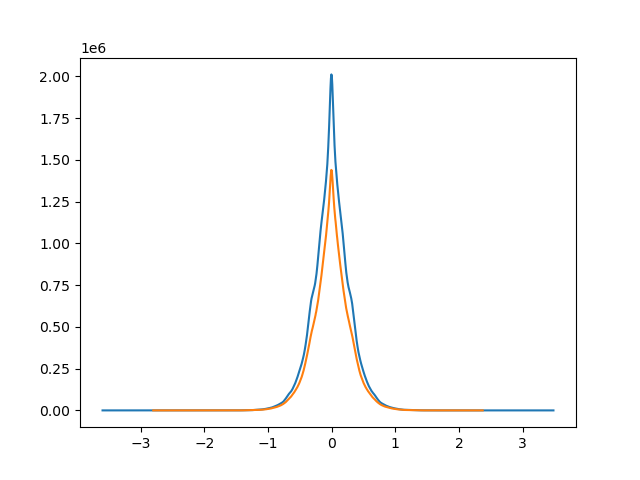

In [6]:
plt.figure()
plt.plot(bordesx04filter[:-1],hx04filter)
plt.plot(bordesy04filter[:-1],hy04filter)


In [7]:
h04filter, bordes04filter=np.histogram(datavelocfilter['v'].values,bins=1000)

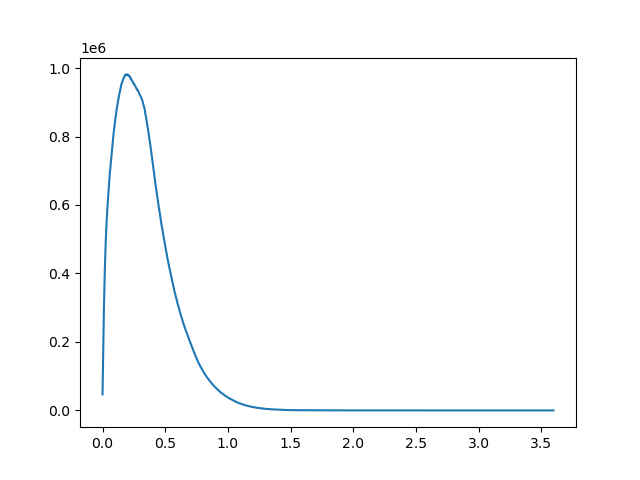

In [8]:
plt.figure()
plt.plot(bordes04filter[:-1],h04filter)

In [9]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.4filter.txt',bordes04filter)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.4filter.txt',h04filter)

## Plotting all together

In [76]:
bordes04filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.4filter.txt')
h04filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.4filter.txt')

In [77]:
bordes035filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.35filter.txt')
h035filter=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.35filter.txt')

In [81]:
bordes035=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.35.txt')
h035=np.loadtxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.35.txt')

(0.0, 0.7)

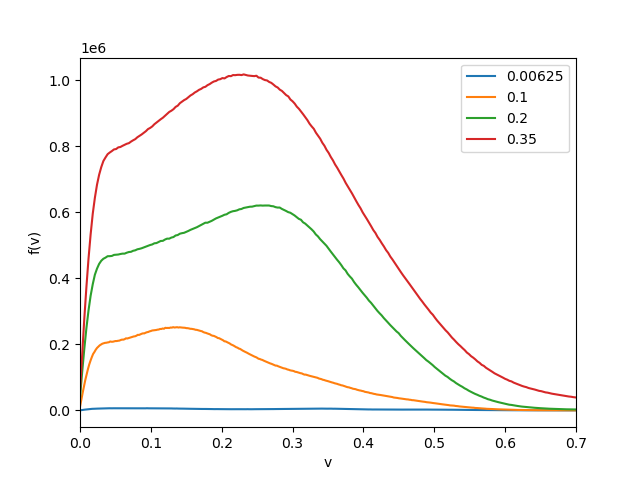

In [82]:
plt.figure()
plt.plot(bordes00625[:-1],h00625)
plt.plot(bordes01[:-1],h01)
plt.plot(bordes02[:-1],h02)
plt.plot(bordes035[:-1],h035)
plt.ylabel('f(v)')
plt.xlabel('v')
plt.legend(['0.00625','0.1','0.2','0.35'],loc='upper right')
plt.xlim(0,0.7)
#plt.yscale('log')

(0.0, 0.7)

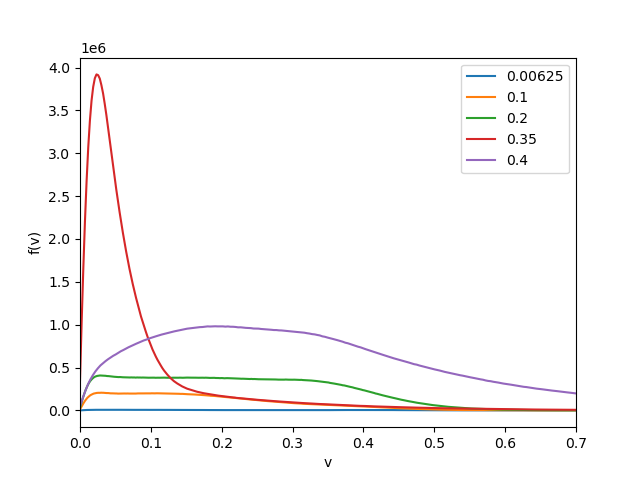

In [83]:
plt.figure()
plt.plot(bordes00625filter[:-1],h00625filter)
plt.plot(bordes01filter[:-1],h01filter)
plt.plot(bordes02filter[:-1],h02filter)
plt.plot(bordes035filter[:-1],h035filter)
plt.plot(bordes04filter[:-1],h04filter)
plt.ylabel('f(v)')
plt.xlabel('v')
plt.legend(['0.00625','0.1','0.2','0.35','0.4'],loc='upper right')
plt.xlim(0,0.7)

In [85]:
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.00625.txt',bordes00625)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.00625.txt',h00625)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.1.txt',bordes01)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.1.txt',h01)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.2.txt',bordes02)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.2.txt',h02)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.35.txt',bordes035)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.35.txt',h035)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.00625filter.txt',bordes00625filter)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.00625filter.txt',h00625filter)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.1filter.txt',bordes01filter)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.1filter.txt',h01filter)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.2filter.txt',bordes02filter)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.2filter.txt',h02filter)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdistbordes_densidad0.35filter.txt',bordes035filter)
np.savetxt('/media/juan/DiscoDuro2G/Serie_Densidad_1.8sigma/Data Processed/fdisth_densidad0.35filter.txt',h035filter)